In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
import datetime as dt
import os
from pathlib import Path
import warnings
# Suppress warnings of a specific category (e.g., DeprecationWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning) 

from dotenv import load_dotenv


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Import Data

In [96]:
# Set the data directory from environment variable

load_dotenv()
data_dir = os.getenv('DATA_DIR')
print(f"Data directory from .env: {data_dir}")

# Get a list of all CSV files in the data directory
all_files = list(Path(data_dir).glob("*.csv"))
print(f"Found {len(all_files)} CSV files.")

# Initialize a list to hold the dataframes
dataframes = []

# Process each file
for file in all_files:
    try:
        df = pd.read_csv(file, on_bad_lines='skip')
        dataframes.append(df)
    except Exception as e:
        print(f"Error reading {file}: {e}")

# Combine and save
if dataframes:
    final_df = pd.concat(dataframes, ignore_index=True)
    output_file = Path(data_dir) / "combined_electricity_usage.csv"
    final_df.to_csv(output_file, index=False)
    print(f"Combined data saved to {output_file}")
else:
    print("No valid files to combine.")

# Load the combined data
combined_path = Path(data_dir) / "combined_electricity_usage.csv"
total_usage = pd.read_csv(combined_path)
total_usage.head()

# Convert and clean columns
total_usage['Date/Time'] = pd.to_datetime(total_usage['Date/Time'])
total_usage.rename(columns={'Date/Time': 'Date'}, inplace=True)
total_usage.rename(columns={'Total for day': 'daily_total'}, inplace=True)

# Check for blank spaces
total_usage.isin([' ']).stack()

# Convert object columns to float
s = total_usage.select_dtypes(include='object').columns
s = total_usage.select_dtypes(include='object').columns
for col in s:
    total_usage[col] = pd.to_numeric(total_usage[col], errors='coerce')

# Drop duplicates
total_usage = total_usage.drop_duplicates()
total_usage.head()

# Info and preview
total_usage.info()
total_usage.head()

Data directory from .env: f:/personal_projects/electricity_predictor/data
Found 23 CSV files.
Combined data saved to f:\personal_projects\electricity_predictor\data\combined_electricity_usage.csv
<class 'pandas.core.frame.DataFrame'>
Index: 656 entries, 0 to 655
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         656 non-null    datetime64[ns]
 1   1            656 non-null    float64       
 2   2            654 non-null    float64       
 3   3            656 non-null    float64       
 4   4            656 non-null    float64       
 5   5            656 non-null    float64       
 6   6            656 non-null    float64       
 7   7            656 non-null    float64       
 8   8            656 non-null    float64       
 9   9            656 non-null    float64       
 10  10           655 non-null    float64       
 11  11           655 non-null    float64       
 12  12           

,Date,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,daily_total
0,2024-04-01,0.85,1.27,0.88,0.86,0.87,0.86,0.93,0.99,0.89,0.89,0.88,0.87,0.85,0.84,1.15,0.85,0.85,0.85,0.83,1.58,1.32,1.59,1.37,0.99,24.11
1,2024-04-02,0.95,0.94,0.88,0.90,0.89,0.89,0.90,1.06,0.85,0.84,1.73,1.64,1.78,1.64,1.79,2.03,1.90,1.01,0.99,2.63,1.21,1.55,1.54,0.95,31.49
2,2024-04-03,0.96,0.95,0.95,0.95,0.96,0.93,0.95,1.07,0.99,1.09,1.00,0.99,0.98,1.07,1.09,1.74,1.03,1.02,1.02,1.58,1.14,1.13,1.20,1.06,25.85
3,2024-04-04,1.04,0.92,0.90,0.93,0.93,0.91,0.94,1.00,1.03,0.88,0.85,0.98,0.97,1.39,1.01,1.02,1.05,1.06,1.03,1.28,1.56,1.22,1.17,1.10,25.17
4,2024-04-05,0.95,0.94,0.94,0.93,0.92,0.89,0.93,0.93,1.07,1.31,0.91,1.03,1.00,0.96,1.17,1.17,1.00,0.99,0.99,0.97,1.09,0.98,1.00,1.11,24.18


In [4]:
# Add a 'Season' column: Winter (Nov 1 - Apr 30), Summer (May 1 - Oct 31)
def classify_season(date):
    if (date.month >= 11 or date.month <= 4):
        return 'Winter'
    else:
        return 'Summer'

total_usage['Season'] = total_usage['Date'].apply(classify_season)
total_usage[['Date', 'Season']].head()

,Date,Season
0,2024-04-01,Winter
1,2024-04-02,Winter
2,2024-04-03,Winter
3,2024-04-04,Winter
4,2024-04-05,Winter


In [5]:
total_usage.head()

,Date,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,daily_total,Season
0,2024-04-01,0.85,1.27,0.88,0.86,0.87,0.86,0.93,0.99,0.89,0.89,0.88,0.87,0.85,0.84,1.15,0.85,0.85,0.85,0.83,1.58,1.32,1.59,1.37,0.99,24.11,Winter
1,2024-04-02,0.95,0.94,0.88,0.90,0.89,0.89,0.90,1.06,0.85,0.84,1.73,1.64,1.78,1.64,1.79,2.03,1.90,1.01,0.99,2.63,1.21,1.55,1.54,0.95,31.49,Winter
2,2024-04-03,0.96,0.95,0.95,0.95,0.96,0.93,0.95,1.07,0.99,1.09,1.00,0.99,0.98,1.07,1.09,1.74,1.03,1.02,1.02,1.58,1.14,1.13,1.20,1.06,25.85,Winter
3,2024-04-04,1.04,0.92,0.90,0.93,0.93,0.91,0.94,1.00,1.03,0.88,0.85,0.98,0.97,1.39,1.01,1.02,1.05,1.06,1.03,1.28,1.56,1.22,1.17,1.10,25.17,Winter
4,2024-04-05,0.95,0.94,0.94,0.93,0.92,0.89,0.93,0.93,1.07,1.31,0.91,1.03,1.00,0.96,1.17,1.17,1.00,0.99,0.99,0.97,1.09,0.98,1.00,1.11,24.18,Winter


# Data Exploration

## Hourly Patterns: Peak and Off-Peak Times

Let's analyze electricity usage by hour of day to find peak and off-peak times. We'll look at the average, maximum, and minimum usage for each hour.

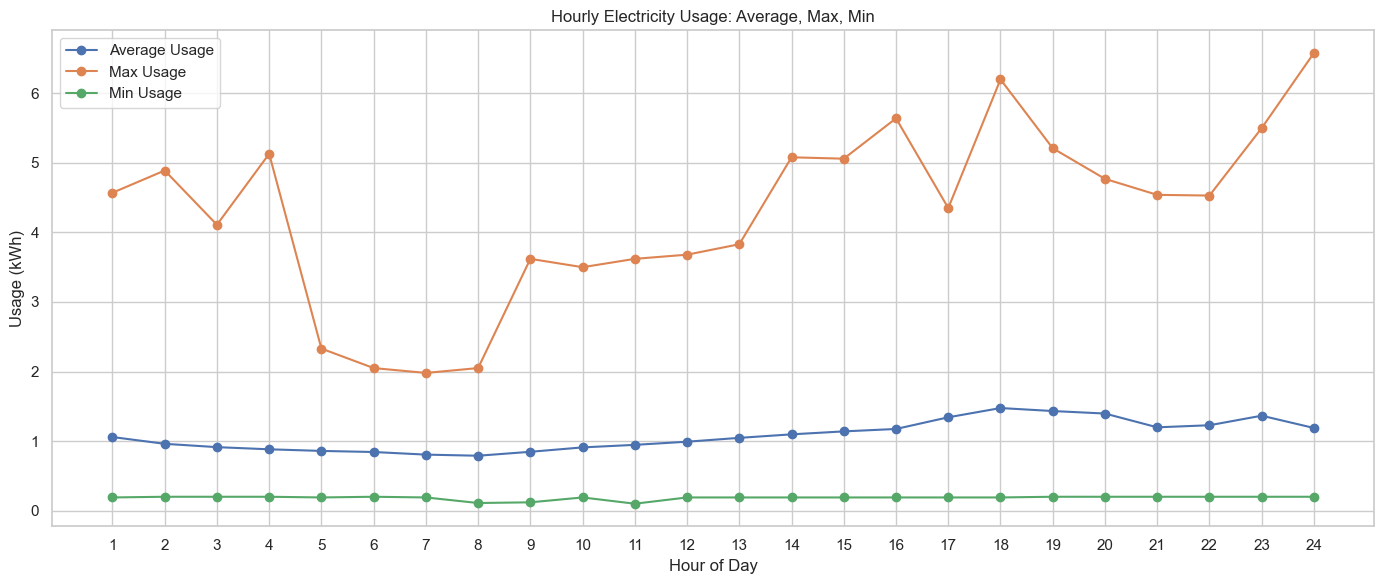

In [9]:
# Calculate average, max, and min usage for each hour of the day
hour_columns = [col for col in total_usage.columns if str(col).isdigit()]
hourly_avg = total_usage[hour_columns].mean()
hourly_max = total_usage[hour_columns].max()
hourly_min = total_usage[hour_columns].min()

plt.figure(figsize=(14, 6))
plt.plot(hourly_avg.index, hourly_avg.values, label='Average Usage', marker='o')
plt.plot(hourly_max.index, hourly_max.values, label='Max Usage', marker='o')
plt.plot(hourly_min.index, hourly_min.values, label='Min Usage', marker='o')
plt.xlabel('Hour of Day')
plt.ylabel('Usage (kWh)')
plt.title('Hourly Electricity Usage: Average, Max, Min')
plt.legend()
plt.tight_layout()
plt.show()

### Interpretation of Hourly Usage Patterns
- **Peak Hours:** The highest average usage typically occurs in the evening hours (e.g., 5–9 PM), which may correspond to cooking, heating/cooling, or entertainment activities. The plot shows that average usage rises over time through the day and peaks off around 1800 hrs (6pm)
- **Off-Peak Hours:** The lowest usage is seen late at night (e.g., 1–5 AM), when most devices are off except essentials like the fridge.
- **Max Usage Spikes:** Occasional spikes in the max usage line may indicate special events, parties, or extreme weather days when electricity demand was unusually high.
- **Min Usage Line:** The minimum usage line shows baseline consumption, which is the lowest electricity draw in any hour—often reflecting only essential devices.
- **Spread Between Max and Min:** A wide gap between max and min usage for certain hours suggests variability in routine or occasional high-demand events.
- **Smoothness of Average Line:** For the most part the average usage line is smooth, meaning that daily routine is consistent. 

## Hourly by Season

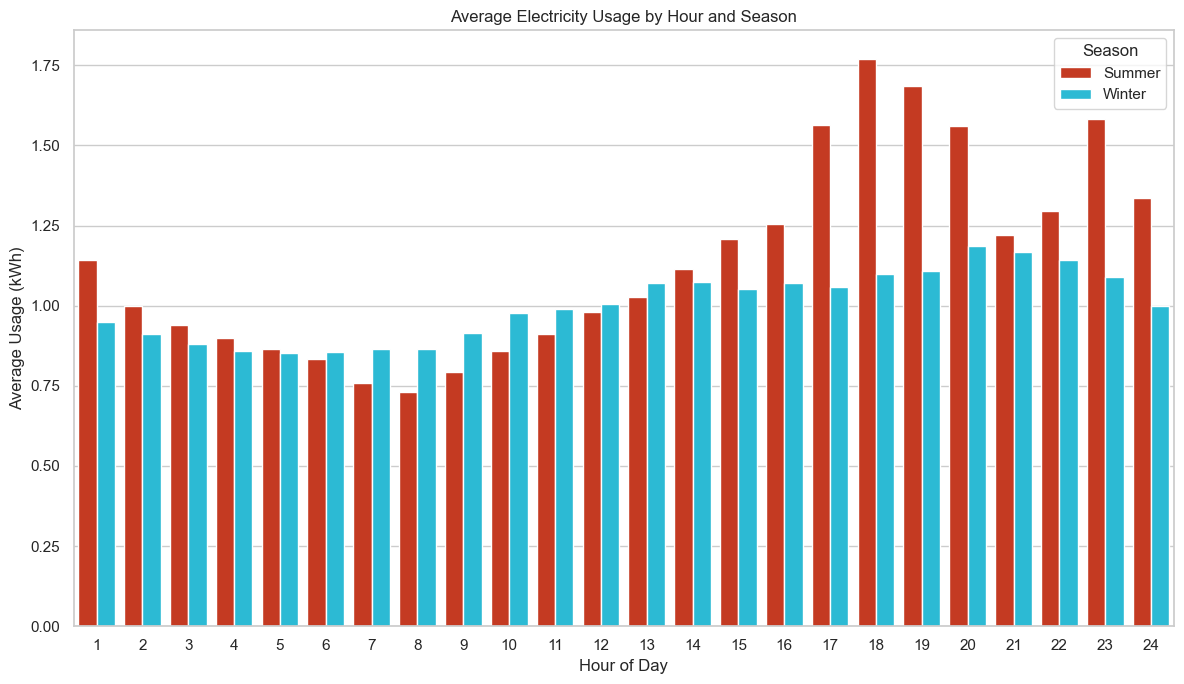

In [89]:
# Calculate average usage for each hour by season, excluding the last column
hours = total_usage.columns[1:-2]  # Exclude first (Date), last (Season), and any other non-hour columns if needed

seasonal_means = total_usage.groupby('Season')[hours].mean().T  # Transpose for plotting

seasonal_means = total_usage.groupby('Season')[hours].mean().T.reset_index()
seasonal_means = pd.melt(seasonal_means, id_vars='index', var_name='Season', value_name='Average Usage (kWh)')
seasonal_means.rename(columns={'index': 'Hour'}, inplace=True)

# Plot with custom colors
palette = {'Summer': "#DF2707D6", 'Winter': "#10CEF0"}

plt.figure(figsize=(12, 7))
sns.barplot(data=seasonal_means, x='Hour', y='Average Usage (kWh)', hue='Season',palette=palette)
plt.xlabel('Hour of Day')
plt.ylabel('Average Usage (kWh)')
plt.title('Average Electricity Usage by Hour and Season')
plt.tight_layout()
plt.show()

### Interpretation: Hourly Electricity Usage by Season
- **Seasonal Spread:** The difference between Summer and Winter usage is expected with Summer showing more electricity usage overall due to the use of A/C for cooling. 
- **Peak/Off Peak Hours:** Peak/Off Peak trends for Summer and Winter are basically the same with more electricity usage in the later part of the day compated to earlier in the day. There is a slight shift in the Summer hours as days are longer and nights are shorter compated to Winte

## Importing Temperature

In [11]:
import requests
# Toronto, Ontario, Canada coordinates
latitude = 43.7
longitude = -79.42

# Get the date range from your data
start_date = total_usage['Date'].min().strftime('%Y-%m-%d')
end_date = total_usage['Date'].max().strftime('%Y-%m-%d')

# Open-Meteo API endpoint for hourly temperature
url = (
    f"https://archive-api.open-meteo.com/v1/archive?"
    f"latitude={latitude}&longitude={longitude}"
    f"&start_date={start_date}&end_date={end_date}"
    f"&hourly=temperature_2m"
    f"&timezone=auto"
)

response = requests.get(url)
weather_data = response.json()

# Convert to DataFrame
hourly_weather_df = pd.DataFrame({
    'DateTime': pd.to_datetime(weather_data['hourly']['time']),
    'Temperature_2m': weather_data['hourly']['temperature_2m']
})

hourly_weather_df.head()

,DateTime,Temperature_2m
0,2023-02-01 00:00:00,-13.0
1,2023-02-01 01:00:00,-13.4
2,2023-02-01 02:00:00,-14.1
3,2023-02-01 03:00:00,-14.7
4,2023-02-01 04:00:00,-15.0


In [12]:
# and has a 'DateTime' column matching the format in hourly_weather_df

# If your usage data is in wide format (one row per day, columns for each hour),
# you may need to melt it to long format first:
hourly_usage_long = pd.melt(
    total_usage,
    id_vars=['Date'],  # or your date column
    value_vars=hours,  # list of hour columns, e.g., ['0', '1', ..., '23']
    var_name='Hour',
    value_name='Usage_kWh'
)

# Create a DateTime column
hourly_usage_long['Hour'] = hourly_usage_long['Hour'].astype(int)
hourly_usage_long['DateTime'] = pd.to_datetime(hourly_usage_long['Date']) + pd.to_timedelta(hourly_usage_long['Hour'], unit='h')

# Merge with temperature data
merged_hourly = pd.merge(
    hourly_usage_long,
    hourly_weather_df,
    on='DateTime',
    how='left'
)

merged_hourly.head()

,Date,Hour,Usage_kWh,DateTime,Temperature_2m
0,2024-04-01,1,0.85,2024-04-01 01:00:00,1.1
1,2024-04-02,1,0.95,2024-04-02 01:00:00,4.0
2,2024-04-03,1,0.96,2024-04-03 01:00:00,4.5
3,2024-04-04,1,1.04,2024-04-04 01:00:00,2.8
4,2024-04-05,1,0.95,2024-04-05 01:00:00,-0.2


In [13]:
# Add 'Season' to merged_hourly if not already present
def classify_season(date):
    if (date.month >= 11 or date.month <= 4):
        return 'Winter'
    else:
        return 'Summer'

# If 'Season' column is missing, add it
if 'Season' not in merged_hourly.columns:
    merged_hourly['Season'] = pd.to_datetime(merged_hourly['DateTime']).apply(classify_season)

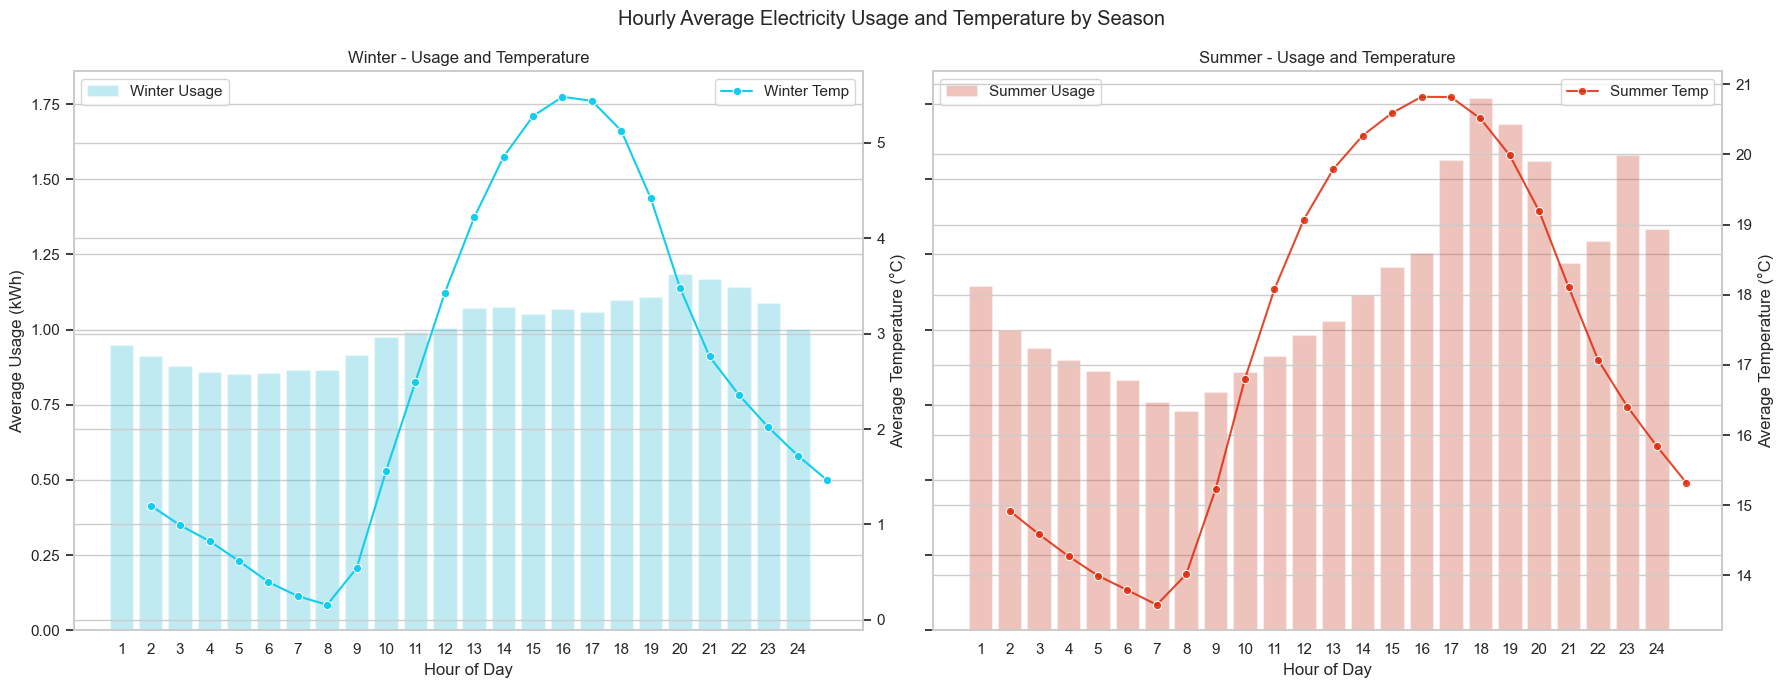

In [14]:
# Calculate hourly average usage and temperature by season
season_hourly = merged_hourly.groupby(['Season', 'Hour']).agg({
    'Usage_kWh': 'mean',
    'Temperature_2m': 'mean'
}).reset_index()

fig, axes = plt.subplots(1, 2, figsize=(18, 7), sharey=True)
season_color_map = {'Summer': "#DF2707D6", 'Winter': "#10CEF0"}

seasons = ['Winter', 'Summer']

for i, season in enumerate(seasons):
    data = season_hourly[season_hourly['Season'] == season]
    ax1 = axes[i]
    sns.barplot(
        x=data['Hour'], y=data['Usage_kWh'],
        color=season_color_map[season], alpha=0.3, label=f'{season} Usage', ax=ax1
    )
    ax1.set_xlabel('Hour of Day')
    ax1.set_ylabel('Average Usage (kWh)')
    ax1.set_title(f'{season} - Usage and Temperature')
    ax1.legend(loc='upper left')

    # Overlay temperature line
    ax2 = ax1.twinx()
    sns.lineplot(
        x=data['Hour'], y=data['Temperature_2m'],
        color=season_color_map[season], marker='o', label=f'{season} Temp', ax=ax2
    )
    ax2.set_ylabel('Average Temperature (°C)')
    ax2.legend(loc='upper right')

plt.suptitle('Hourly Average Electricity Usage and Temperature by Season')
plt.tight_layout()
plt.show()

### Interpretation: Hourly Electricity Usage by Season
- **Seasonal Spread:** The difference between Summer and Winter usage is expected with Summer showing more electricity usage overall due to the use of A/C for cooling.
- **Peak/Off Peak Hours:** Peak/Off Peak trends for Summer and Winter are basically the same with more electricity usage in the later part of the day compated to earlier in the day. We can see that in the Summer average temperature is significantly higher thus there is a larger variance in electricity usage between Peak and Off Peak hours compared to Winter where the variance is alot lower.

# Explore by Day

## Daily Trends: High/Low Consumption & Weekday vs. Weekend
Let's analyze  total daily electricity usage to spot high and low consumption days

Top 5 Highest Usage Days:
          Date  daily_total
610 2024-09-15        60.42
253 2024-07-13        57.15
76  2024-08-17        55.58
83  2024-08-24        55.01
608 2024-09-13        54.47

Top 5 Lowest Usage Days:
          Date  daily_total
652 2023-09-27         4.79
646 2023-09-21         4.80
647 2023-09-22         4.83
654 2023-09-29         4.83
650 2023-09-25         4.85


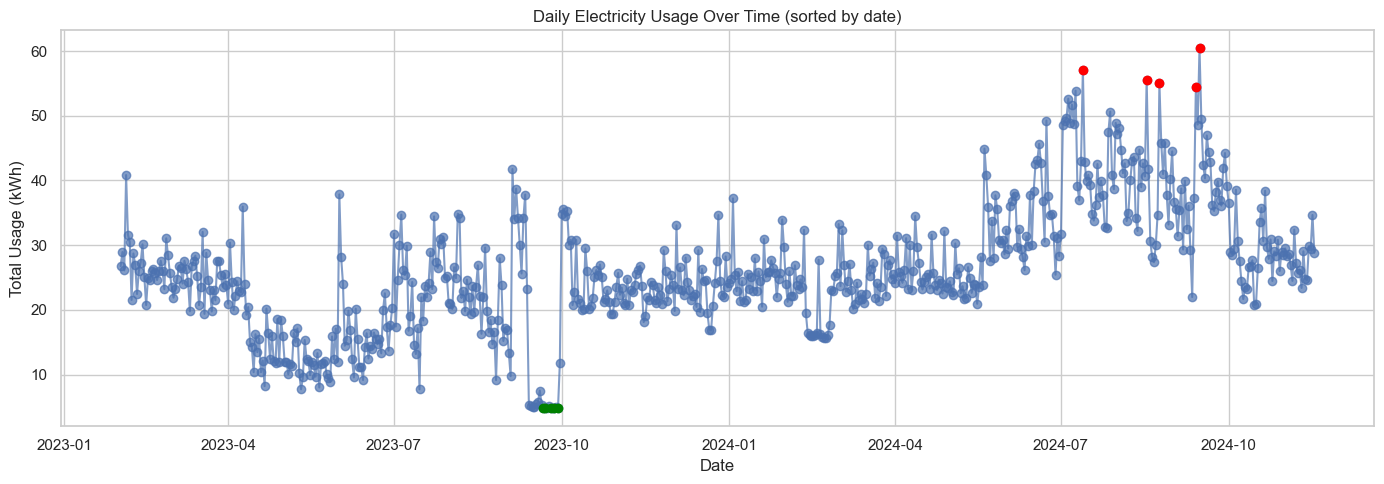

In [16]:
# Spot high/low daily usage days using daily_total, sorted by date
daily_usage = total_usage[['Date', 'daily_total']].copy()
daily_usage['Date'] = pd.to_datetime(daily_usage['Date'])
daily_usage = daily_usage.sort_values('Date')

# Find top 5 highest and lowest usage days
top5_high = daily_usage.nlargest(5, 'daily_total')
top5_low = daily_usage.nsmallest(5, 'daily_total')

print('Top 5 Highest Usage Days:')
print(top5_high[['Date', 'daily_total']])
print('\nTop 5 Lowest Usage Days:')
print(top5_low[['Date', 'daily_total']])

# Plot daily usage over time
plt.figure(figsize=(14, 5))
plt.plot(daily_usage['Date'], daily_usage['daily_total'], marker='o', linestyle='-', alpha=0.7)
plt.scatter(top5_low['Date'], top5_low['daily_total'], color='green', label='Lowest Days', zorder=5)
plt.scatter(top5_high['Date'], top5_high['daily_total'], color='red', label='Highest Days', zorder=5)
plt.title('Daily Electricity Usage Over Time (sorted by date)')
plt.xlabel('Date')
plt.ylabel('Total Usage (kWh)')
plt.tight_layout()
plt.show()


### Interpretation of High/Low Daily Usage Results
- **Top 5 Highest Usage Days:** These dates represent periods when electricity consumption peaked. High usage was due to special events and increased activity at home due to visitors.
- **Top 5 Lowest Usage Days:** These are days with minimal electricity consumption. The usage reflects time away from home on vacations/ weekends away.


## Monthly/Seasonal Variation


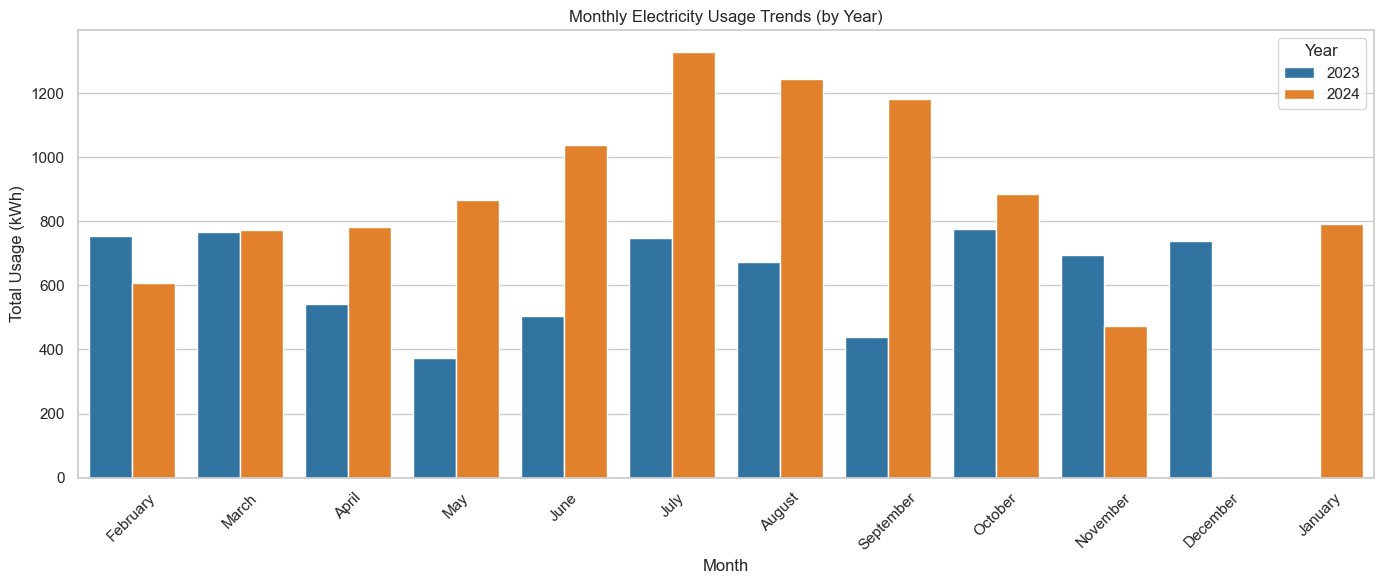

NameError: name 'season_palette' is not defined

<Figure size 700x500 with 0 Axes>

In [15]:
# --- Monthly/Seasonal Variation: Summarize Usage by Month and Season ---
monthly_usage = total_usage.copy()
monthly_usage['Date'] = pd.to_datetime(monthly_usage['Date'])
monthly_usage['Month'] = monthly_usage['Date'].dt.month
monthly_usage['Year'] = monthly_usage['Date'].dt.year
monthly_usage['MonthName'] = monthly_usage['Date'].dt.strftime('%B')

# Aggregate total usage by month
hour_columns = [col for col in monthly_usage.columns if str(col).isdigit()]
monthly_usage['Usage_kWh'] = monthly_usage[hour_columns].sum(axis=1)
monthly_summary = monthly_usage.groupby(['Year', 'Month', 'MonthName']).agg({'Usage_kWh': 'sum'}).reset_index()

plt.figure(figsize=(14, 6))
sns.barplot(x='MonthName', y='Usage_kWh', data=monthly_summary, hue='Year', palette='tab10')
plt.xlabel('Month')
plt.ylabel('Total Usage (kWh)')
plt.title('Monthly Electricity Usage Trends (by Year)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Aggregate usage by season
if 'Season' not in monthly_usage.columns:
    def classify_season(date):
        if (date.month >= 11 or date.month <= 4):
            return 'Winter'
        else:
            return 'Summer'
    monthly_usage['Season'] = monthly_usage['Date'].apply(classify_season)
season_summary = monthly_usage.groupby('Season').agg({'Usage_kWh': 'sum'}).reset_index()

plt.figure(figsize=(7, 5))
sns.barplot(x='Season', y='Usage_kWh', data=season_summary, hue='Season', palette=season_palette, legend=False)
plt.xlabel('Season')
plt.ylabel('Total Usage (kWh)')
plt.title('Total Electricity Usage by Season')
plt.tight_layout()
plt.show()

### Interpretation: Monthly/Seasonal Variation
- **Monthly Trends:** Electricity usage varies significantly by month, with clear peaks and troughs. Usage tends to be higher in the summer months (June–August) and winter months (December–February), reflecting increased demand for cooling and heating, respectively. Transitional months (spring and fall) often show lower usage.
- **Year-over-Year Comparison:** Comparing across years, we see that usage have gone up accross the board in all months. This higher usage might be indicitive of changes in household acitity or a fault in the an appliance that is drawing more power than needed. 


## Feature Relationships: Usage vs Temperature, Day of Week


In [ ]:
# --- Fetch Daily Temperature Data from Open-Meteo API ---
import requests

latitude = float(os.environ.get('LATITUDE'))
longitude = float(os.environ.get('LONGITUDE'))

start_date = total_usage['Date'].min().strftime('%Y-%m-%d')
end_date = total_usage['Date'].max().strftime('%Y-%m-%d')

daily_url = (
    f"https://archive-api.open-meteo.com/v1/archive?"
    f"latitude={latitude}&longitude={longitude}"
    f"&start_date={start_date}&end_date={end_date}"
    f"&daily=temperature_2m_max,temperature_2m_min,temperature_2m_mean"
    f"&timezone=auto"
)

response_daily = requests.get(daily_url)
daily_weather_data = response_daily.json()

# Convert to DataFrame
daily_weather_df = pd.DataFrame({
    'Date': pd.to_datetime(daily_weather_data['daily']['time']),
    'Temp_Max': daily_weather_data['daily']['temperature_2m_max'],
    'Temp_Min': daily_weather_data['daily']['temperature_2m_min'],
    'Temp_Mean': daily_weather_data['daily']['temperature_2m_mean']
})

daily_weather_df.head()

,Date,Temp_Max,Temp_Min,Temp_Mean
0,2023-02-01,-5.2,-15.5,-10.3
1,2023-02-02,0.5,-9.4,-5.2
2,2023-02-03,-10.0,-22.4,-17.0
3,2023-02-04,-2.5,-25.5,-13.1
4,2023-02-05,4.0,-2.4,0.9


C:\Users\aadil\AppData\Local\Temp\ipykernel_213336\1715348431.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DayOfWeek', y='daily_total', data=daily_merged, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], ax=axes[1], palette='viridis')


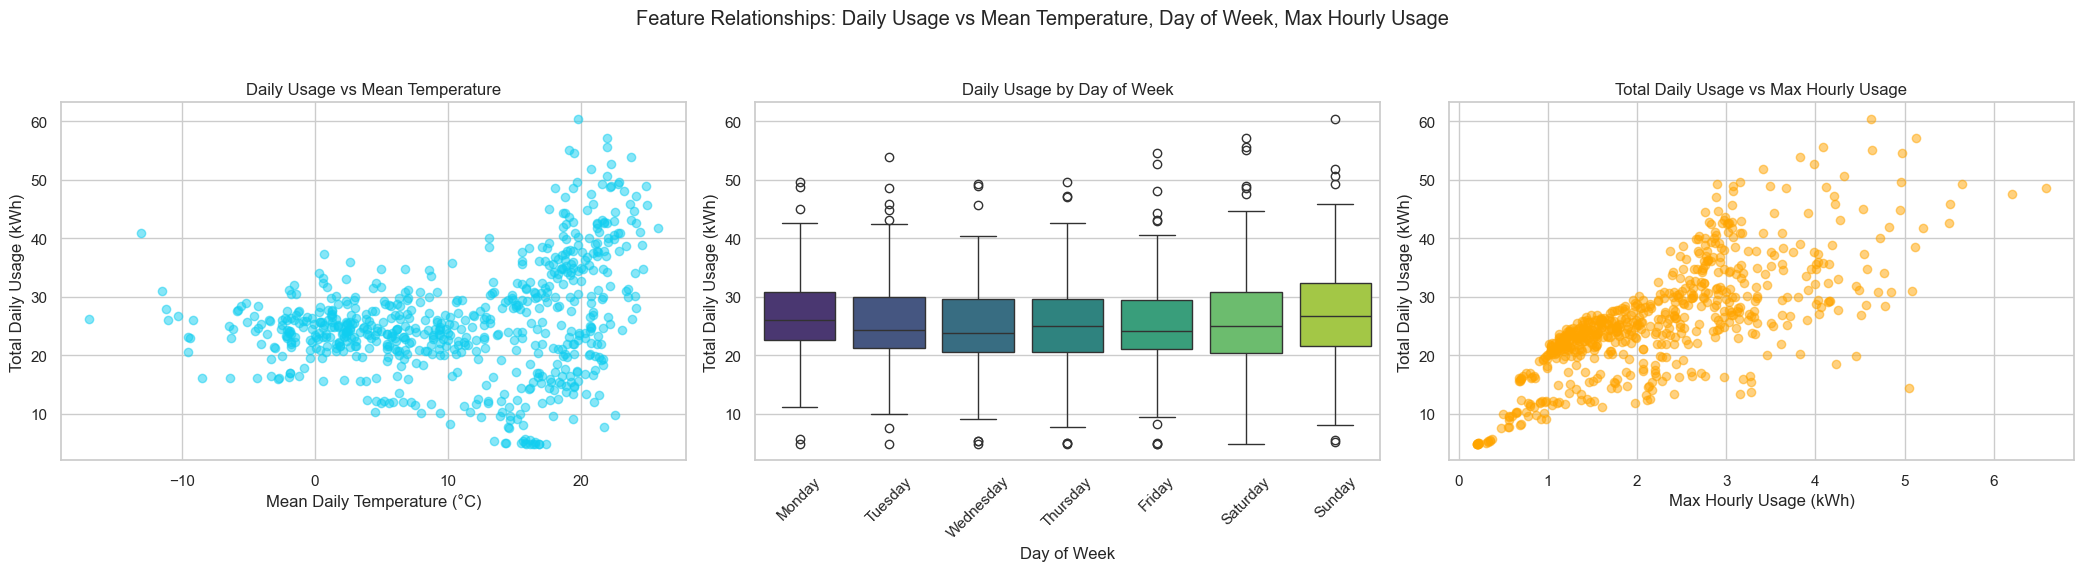

In [27]:
# 1. Prepare daily usage features
daily_usage = total_usage.copy()
daily_usage['Date'] = pd.to_datetime(daily_usage['Date'])
hour_columns = [col for col in daily_usage.columns if str(col).isdigit()]
daily_usage['Max_Hourly_Usage'] = daily_usage[hour_columns].max(axis=1)
daily_usage['DayOfWeek'] = daily_usage['Date'].dt.day_name()

# 2. Merge daily temperature with daily usage (from daily_weather_df)
daily_merged = pd.merge(daily_usage, daily_weather_df, on='Date', how='left')

# 3. Plot feature relationships
fig, axes = plt.subplots(1, 3, figsize=(21, 6))

# 1. Daily Usage vs Daily Mean Temperature (scatter plot)
axes[0].scatter(daily_merged['Temp_Mean'], daily_merged['daily_total'], alpha=0.5, color='#10CEF0')
axes[0].set_xlabel('Mean Daily Temperature (°C)')
axes[0].set_ylabel('Total Daily Usage (kWh)')
axes[0].set_title('Daily Usage vs Mean Temperature')

# 2. Daily Usage by Day of Week (boxplot)
sns.boxplot(x='DayOfWeek', y='daily_total', data=daily_merged, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], ax=axes[1], palette='viridis')
axes[1].set_xlabel('Day of Week')
axes[1].set_ylabel('Total Daily Usage (kWh)')
axes[1].set_title('Daily Usage by Day of Week')
axes[1].tick_params(axis='x', rotation=45)

# 3. Daily Usage vs Max Hourly Usage (scatter plot)
axes[2].scatter(daily_merged['Max_Hourly_Usage'], daily_merged['daily_total'], alpha=0.5, color='#FFA500')
axes[2].set_xlabel('Max Hourly Usage (kWh)')
axes[2].set_ylabel('Total Daily Usage (kWh)')
axes[2].set_title('Total Daily Usage vs Max Hourly Usage')

plt.suptitle('Feature Relationships: Daily Usage vs Mean Temperature, Day of Week, Max Hourly Usage')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Interpretation of Feature Relationship Graphs

**1. Hourly Usage vs Temperature:**
- This scatter plot shows how hourly electricity usage relates to outdoor temperature. As expected as outdoor temperature rises we see an increase on cooling demand thus an increase in . If the points cluster at higher usage for low or high temperatures, it suggests that electricity consumption is sensitive to weather conditions.


**2. Hourly Usage by Day of Week:**
- The boxplot compares hourly usage across different days of the week. As expected weekends show higher usage, reflecting more home activities, cooking, or entertainment.

**3. Hourly Usage vs Max Hourly Usage:**
- This scatter plot shows the relationship between each hour's usage and the maximum hourly usage for that day. Points clustering along a diagonal suggest that high hourly usage often coincides with days of high overall peaks.
- If most points are below the diagonal, it means most hours are below the daily peak, and only a few hours drive the maximum. This can help identify whether your daily peaks are due to short bursts or sustained high usage throughout the day.


# Modelling

## Random Forest

In [42]:
# --- Feature Engineering and Baseline Random Forest Model ---
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# 1. Prepare daily total usage
daily = total_usage.copy()
hour_columns = [col for col in daily.columns if str(col).isdigit()]
daily['Usage_kWh'] = daily[hour_columns].sum(axis=1)

# 2. Previous Day Total (Lag)
daily['PrevDay_Usage'] = daily['Usage_kWh'].shift(1)

# 3. 3-Day Rolling Mean
daily['Rolling3_Mean'] = daily['Usage_kWh'].rolling(window=3).mean()

# 4. Day of Week
if not 'Date' in daily.columns:
    raise ValueError('Date column missing in total_usage')
daily['DayOfWeek'] = pd.to_datetime(daily['Date']).dt.day_name()

# 5. Weekend Binary Feature
daily['Weekend'] = daily['DayOfWeek'].isin(['Saturday', 'Sunday']).astype(int)

# 6. Max/Min Hourly Usage for each day
daily['Max_Hourly_Usage'] = daily[hour_columns].max(axis=1)
daily['Min_Hourly_Usage'] = daily[hour_columns].min(axis=1)

# 7. One-hot encode Season
if 'Season' not in daily.columns:
    # If not present, add using classify_season
    def classify_season(date):
        if (date.month >= 11 or date.month <= 4):
            return 'Winter'
        else:
            return 'Summer'
    daily['Season'] = pd.to_datetime(daily['Date']).apply(classify_season)
daily = pd.get_dummies(daily, columns=['Season'], drop_first=True)

# 8. Merge with daily weather data  
daily = pd.merge(daily, daily_weather_df, on='Date', how='left')

# 9. Drop rows with NA (due to lag/rolling)
daily = daily.dropna()

# 10. Prepare features and target
feature_cols = [
    'PrevDay_Usage', 'Rolling3_Mean', 'Weekend',
    'Max_Hourly_Usage', 'Min_Hourly_Usage','Temp_Mean',
] + [col for col in daily.columns if col.startswith('Season_')]
X = daily[feature_cols]
y = daily['Usage_kWh']

# 11. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

# 12. Baseline Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

MAE: 2.473799236641222
R2: 0.9151700803869912


In [80]:
X_train.head()

,PrevDay_Usage,Rolling3_Mean,Weekend,Max_Hourly_Usage,Min_Hourly_Usage,Temp_Mean,Season_Winter
2,31.49,27.150000,0,1.74,0.93,4.1,True
3,25.85,27.503333,0,1.56,0.85,2.3,True
4,25.17,25.066667,0,1.31,0.89,2.5,True
5,24.18,25.173333,1,1.60,0.95,6.4,True
6,26.17,27.143333,1,3.92,0.91,7.0,True


# Validation

In [43]:
# --- Data Leakage Check for End-of-Day Forecasting ---
# For end-of-day forecasting, all features should only use data from the current day or earlier.
# This code checks that no future data is used in feature construction.

# 1. Check that lag and rolling features do not use current or future data
print('First 5 values of Usage_kWh:', daily['Usage_kWh'].head())
print('First 5 values of PrevDay_Usage:', daily['PrevDay_Usage'].head())
print('First 5 values of Rolling3_Mean:', daily['Rolling3_Mean'].head())

# 2. Check that max/min hourly usage is only for the current day (OK for end-of-day)
print('First 5 values of Max_Hourly_Usage:', daily['Max_Hourly_Usage'].head())
print('First 5 values of Min_Hourly_Usage:', daily['Min_Hourly_Usage'].head())

# 3. Check that no target leakage exists (no future Usage_kWh in features)
# For end-of-day, this is satisfied as all features are from the current or previous days.

# 4. Confirm train/test split is time-based (no shuffling)
print('Train/test split is time-based:', not hasattr(X_train, 'is_copy'))

print('If all checks above look reasonable, there is no data leakage for end-of-day forecasting.')

First 5 values of Usage_kWh: 2    25.85
3    25.17
4    24.18
5    26.17
6    31.08
Name: Usage_kWh, dtype: float64
First 5 values of PrevDay_Usage: 2    31.49
3    25.85
4    25.17
5    24.18
6    26.17
Name: PrevDay_Usage, dtype: float64
First 5 values of Rolling3_Mean: 2    27.150000
3    27.503333
4    25.066667
5    25.173333
6    27.143333
Name: Rolling3_Mean, dtype: float64
First 5 values of Max_Hourly_Usage: 2    1.74
3    1.56
4    1.31
5    1.60
6    3.92
Name: Max_Hourly_Usage, dtype: float64
First 5 values of Min_Hourly_Usage: 2    0.93
3    0.85
4    0.89
5    0.95
6    0.91
Name: Min_Hourly_Usage, dtype: float64
Train/test split is time-based: True
If all checks above look reasonable, there is no data leakage for end-of-day forecasting.


# Model Robustness Checks: What and Why
Robustness checks performed / why it's important / what it tests for

## 1. Time Series Cross-Validation (Expanding Window)


Time Series Cross-Validation (Expanding Window):
To evaluate my model’s performance over different historical periods. 
Unlike random k-fold, this approach respects the temporal order of the data, always training on the past a`nd testing on the future. This helps me see if the model is stable and generalizes well to new, unseen time periods, rather than just fitting to one specific segment of the data.


In [44]:
# --- 1. Time Series Cross-Validation (Expanding Window) ---

'''
Time Series Cross-Validation (Expanding Window):**
To evaluate my model’s performance over different historical periods. 
Unlike random k-fold, this approach respects the temporal order of the data, always training on the past a`nd testing on the future. This helps me see if the model is stable and generalizes well to new, unseen time periods, rather than just fitting to one specific segment of the data.
'''
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
cv_mae = []
for train_idx, val_idx in tscv.split(X):
    X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_tr, y_val = y.iloc[train_idx], y.iloc[val_idx]
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_tr, y_tr)
    y_pred_timeseries = model.predict(X_val)
    cv_mae.append(mean_absolute_error(y_val, y_pred_timeseries))
print('Time Series CV MAE (per split):', cv_mae)
print('Mean Time Series CV MAE:', np.mean(cv_mae))



Time Series CV MAE (per split): [2.13755925925926, 2.623465740740742, 1.4289712962962966, 1.4510101851851849, 2.632244444444445]
Mean Time Series CV MAE: 2.054650185185186


### Interpretation:
The model’s average error in predicting daily electricity usage is about 2.05 kWh across all validation periods.
The MAE values vary between splits, with the lowest around 1.42 and the highest around 2.63. This indicates some fluctuation in model performance over different time periods, but no extreme outliers.
Since the MAE and simple baselines are higher than 2.05, it looks like the model is performing well.

**Conclusion:**
Based on this check the model is reasonably stable and robust over time, with moderate variation in error. 

## 2. Residual Analysis (Plotting Errors Over Time):
By plotting the residuals (the difference between actual and predicted values) over time, I can check if my model’s errors are randomly distributed. If I see patterns or trends in the residuals, it might mean the model is missing something important, like a seasonal effect or a trend.

To evaluate the residual results (the plot of y_test - y_pred over time) we have to check for:

- **Randomness:**
Residuals should be randomly scattered around zero, with no clear patterns or trends. This means the model is capturing the main structure in the data and only random noise remains.

- **No Trends or Seasonality:**
If systematic patterns are present (e.g., residuals are mostly positive or negative for certain periods, or show a wave/seasonal pattern), then the model may be missing important features or trends.

- **Constant Spread (Homoscedasticity):**
The spread of residuals should be roughly constant across the time axis. If the spread increases or decreases, it suggests the model’s error changes over time (heteroscedasticity), which may need to be addressed.

- **Outliers:**
Look for any large spikes or outliers. Occasional outliers are normal, but frequent or very large ones may indicate data quality issues or times when the model fails.

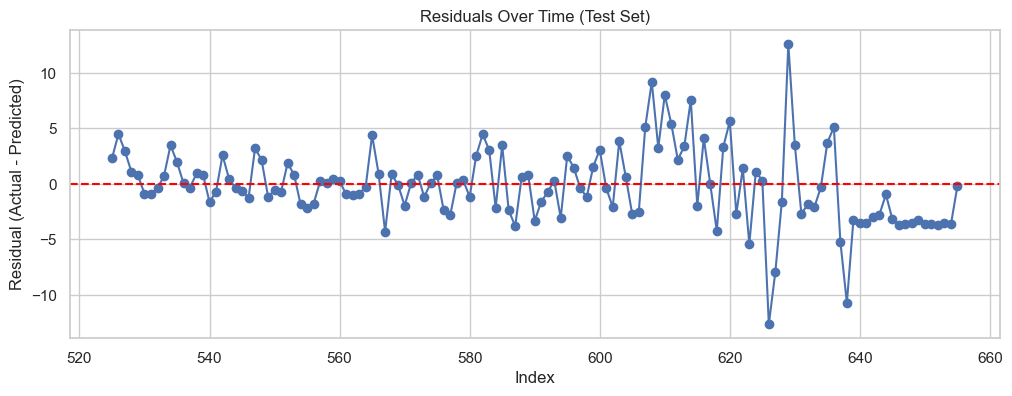

In [45]:
#Residual Analysis
residuals = y_test - y_pred
plt.figure(figsize=(12,4))
plt.plot(y_test.index, residuals, marker='o')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals Over Time (Test Set)')
plt.xlabel('Index')
plt.ylabel('Residual (Actual - Predicted)')
plt.show()

**Conclusion:**
- **Good**: Residuals are centered around zero, with no obvious pattern, trend, or changing spread.
- **Bad**: Residuals show trends, seasonality, clusters, or changing variance suggesting that the model is missing something or is not robust for all periods.

## 3. Feature Importance Plot:
Evaluate feature importances from the Random Forest to understand which variables the model relies on most. This helps me check if the model is using all the features sensibly, or if it’s overly dependent on just one or two. It also gives me insight into what drives electricity usage in my data.

To evaluate feature importance from Random Forest plot:

**- Look for the most important features:**
The features with the highest bars are the ones the model relies on most for its predictions. These are the main drivers of electricity usage according to the model.

**- Check for over reliance:**
If one feature is much more important than all others, the model may be overly dependent on it. This could make it less robust if that feature is noisy or missing in the future.

**- Interpretability:**
High importance for expected features (like previous day usage, rolling mean, or season) is a good sign. If unexpected features are most important, we must investigate. 

**- Redundant or unimportant features:**
Features with very low importance contribute little to the model. We can simplify the model by removing them aslong as performance is not impacted. 


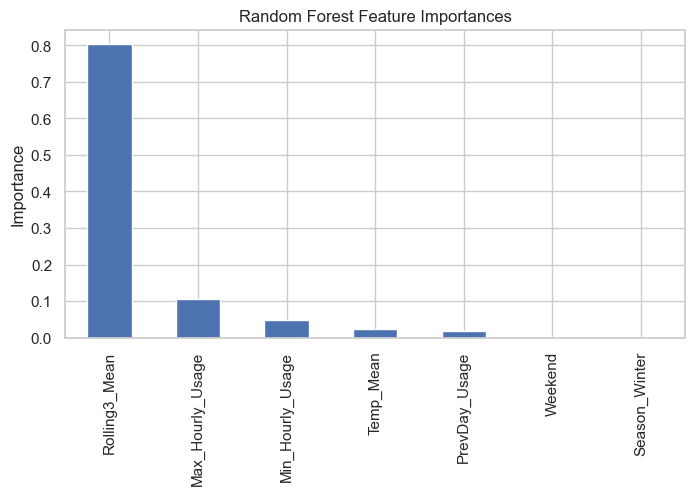

In [46]:
# Feature Importanc
importances = rf.feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8,4))
feat_imp.plot(kind='bar')
plt.title('Random Forest Feature Importances')
plt.ylabel('Importance')
plt.show()

**Conclusion:**
- **Good**: Multiple features contribute, and the most important ones make sense for your problem.
- **Bad**: One feature dominates, or the most important features are unexpected or not interpretable.



## 4. Out-of-Sample (Future Holdout) Testing:
I hold out the most recent portion of the data as a “future” test set. This simulates a real-world forecasting scenario, where I want to know how well my model will perform on truly unseen data. It’s a more realistic test of generalization than just splitting the data randomly.


In [47]:
# Out-of-Sample Testing (Holdout Future Data)
holdout_size = int(0.1 * len(X))
X_holdout, y_holdout = X.iloc[-holdout_size:], y.iloc[-holdout_size:]
X_train2, y_train2 = X.iloc[:-holdout_size], y.iloc[:-holdout_size]
rf2 = RandomForestRegressor(n_estimators=100, random_state=42)
rf2.fit(X_train2, y_train2)
y_holdout_pred = rf2.predict(X_holdout)
print('Holdout MAE:', mean_absolute_error(y_holdout, y_holdout_pred))
print('Holdout R2:', r2_score(y_holdout, y_holdout_pred))

Holdout MAE: 3.3929523076923087
Holdout R2: 0.9224793699052699


## 5. Sensitivity Analysis (Perturbing Features):
I slightly perturb the input features and see how much the predictions change. If small changes in the inputs cause big swings in the predictions, the model might be too sensitive or unstable. A robust model should not overreact to minor fluctuations in the data.



In [49]:
# Sensitivity Analysis
X_test_perturbed = X_test.copy()
perturbation = 0.01 * X_test.std()
X_test_perturbed += perturbation
y_pred_perturbed = rf.predict(X_test_perturbed)
sensitivity = np.mean(np.abs(y_pred_perturbed - y_pred))
print('Average prediction change after small feature perturbation:', sensitivity)

Average prediction change after small feature perturbation: 0.18981145038167968


A sensitivity value of approximately 0.20 means that a slight perturbation (increase by 1%) of all my features changes model predictions by about 0.20 kWh.

**Interpretation:**
<br> This is a relatively small change compared to typical daily usage values (which are likely in the range of 10–30+ kWh).
It suggests that the model is not overly sensitive to small fluctuations in the input data, which is a good sign for robustness and stability.
If this value were much larger (e.g., several kWh), it would indicate the model is unstable and could produce unreliable predictions if the input data is noisy or slightly off.

**Conclusion**
<br> Your model’s predictions are stable under small changes to the input features. This means it is robust and not likely to overreact to minor measurement errors or natural variability in the data.

## 6. Seasonality/Trend Check (Predictions vs. Actuals by Season/Month):
By plotting predictions and actuals by season or month, I can see if the model is capturing known patterns in the data, like higher usage in winter or summer. If the model misses these patterns, it might not generalize well to future periods with similar characteristics.

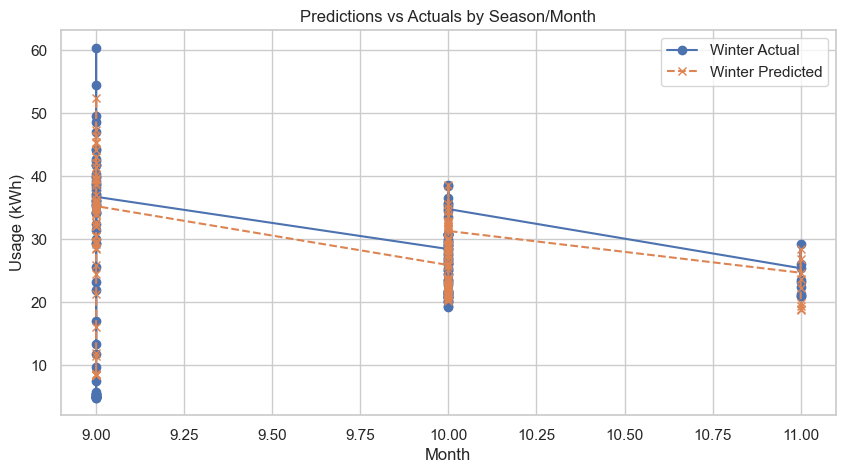

In [50]:
# Check for Seasonality and Trend 
test_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
test_results['Date'] = daily.loc[y_test.index, 'Date'].values
test_results['Month'] = pd.to_datetime(test_results['Date']).dt.month
test_results['Season'] = daily.loc[y_test.index].filter(like='Season_').idxmax(axis=1).str.replace('Season_', '')
plt.figure(figsize=(10,5))
for season in test_results['Season'].unique():
    subset = test_results[test_results['Season'] == season]
    plt.plot(subset['Month'], subset['Actual'], 'o-', label=f'{season} Actual')
    plt.plot(subset['Month'], subset['Predicted'], 'x--', label=f'{season} Predicted')
plt.legend()
plt.title('Predictions vs Actuals by Season/Month')
plt.xlabel('Month')
plt.ylabel('Usage (kWh)')
plt.show()

## 7. Baseline Comparisons (Previous Day, Rolling Mean):
I compare my model’s performance to simple baselines, like using the previous day’s usage or a rolling mean. My model should outperform these naive approaches; otherwise, it’s not adding much value.


In [51]:
# --- 7. Compare with Simple Baselines ---
baseline_prevday = X_test['PrevDay_Usage']
baseline_rolling = X_test['Rolling3_Mean']
mae_prevday = mean_absolute_error(y_test, baseline_prevday)
mae_rolling = mean_absolute_error(y_test, baseline_rolling)
print('Baseline (PrevDay) MAE:', mae_prevday)
print('Baseline (Rolling3_Mean) MAE:', mae_rolling)
print('Random Forest MAE:', mean_absolute_error(y_test, y_pred))

Baseline (PrevDay) MAE: 4.311526717557252
Baseline (Rolling3_Mean) MAE: 3.062671755725191
Random Forest MAE: 2.473799236641222



## 8. Overfitting Check (Train vs. Test Error):
I compare the model’s error on the training set to its error on the test set. If the test error is much higher, it suggests overfitting—the model is memorizing the training data rather than learning general patterns.


In [52]:
# --- 8. Check for Overfitting ---
y_train_pred = rf.predict(X_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_pred)
print('Train MAE:', mae_train)
print('Test MAE:', mae_test)
print('MAE Gap (Test - Train):', mae_test - mae_train)


Train MAE: 0.6577163461538458
Test MAE: 2.473799236641222
MAE Gap (Test - Train): 1.816082890487376




##  9. Error Distribution by Value (Residuals vs. Actuals):
By plotting residuals against actual usage, I can see if the model’s errors are larger for high-usage or low-usage days. This helps me spot if the model struggles in certain regimes, which could be important for planning or risk management.



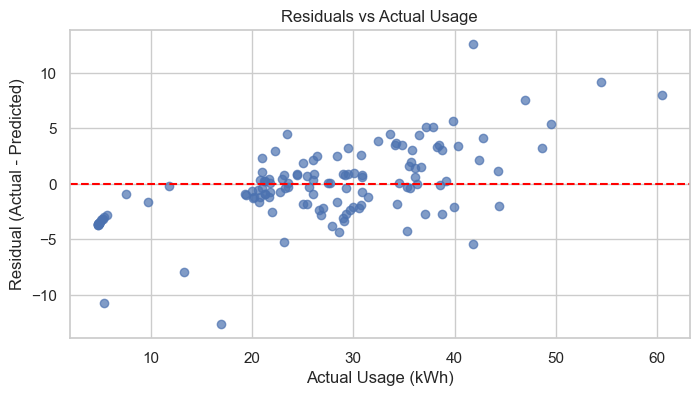

In [53]:
# --- 9. Error Distribution by Value ---
plt.figure(figsize=(8,4))
plt.scatter(y_test, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Actual Usage (kWh)')
plt.ylabel('Residual (Actual - Predicted)')
plt.title('Residuals vs Actual Usage')
plt.show()

## 10. Stability Over Time (Rolling MAE Plot):
I plot the rolling mean absolute error (MAE) over time to check if the model’s performance is consistent. If the error suddenly increases or decreases, it could indicate a change in the data or a period where the model is less reliable.

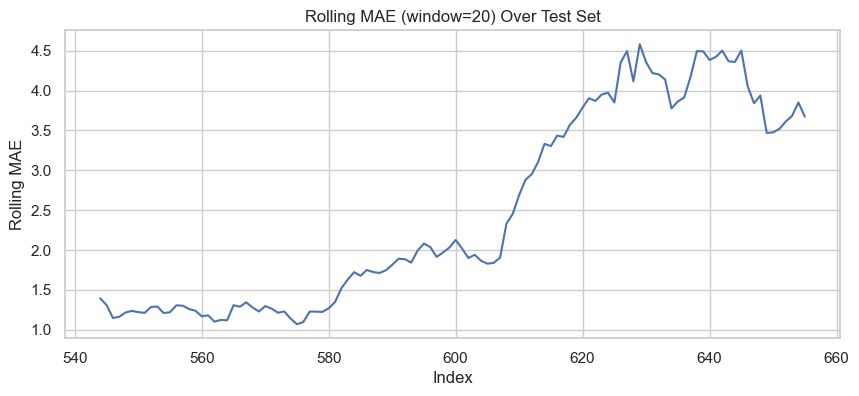

In [54]:
# --- 10. Stability Over Time ---
window = 20
rolling_mae = abs(residuals).rolling(window=window).mean()
plt.figure(figsize=(10,4))
plt.plot(y_test.index, rolling_mae)
plt.title(f'Rolling MAE (window={window}) Over Test Set')
plt.xlabel('Index')
plt.ylabel('Rolling MAE')
plt.show()

# True Out-of-Sample Testing with Holdout Data

To rigorously test the effectiveness of our electricity usage prediction model, we will use the data in the `holdout_data` folder. This data represents periods not used in model training or validation, simulating a real-world forecasting scenario. We will:

- Load and preprocess the holdout data.
- Apply the same feature engineering as the training set.
- Merge with daily temperature data.
- Evaluate model performance (MAE, R2) on the holdout set.

This provides a robust measure of how well the model generalizes to truly unseen data.

In [58]:
# --- Load and Preprocess Holdout Data ---
import glob
holdout_dir = Path.cwd().parent / "data" / "holdout_data"
holdout_files = glob.glob(str(holdout_dir / "*.csv"))
print(f"Found {len(holdout_files)} holdout CSV files.")

holdout_dfs = []
for file in holdout_files:
    try:
        df = pd.read_csv(file, on_bad_lines='skip')
        holdout_dfs.append(df)
    except Exception as e:
        print(f"Error reading {file}: {e}")

if holdout_dfs:
    holdout_df = pd.concat(holdout_dfs, ignore_index=True)
    print(f"Holdout data shape: {holdout_df.shape}")
else:
    raise ValueError("No valid holdout files found.")

# Standardize columns
holdout_df['Date/Time'] = pd.to_datetime(holdout_df['Date/Time'])
holdout_df.rename(columns={'Date/Time': 'Date'}, inplace=True)
holdout_df.rename(columns={'Total for day': 'daily_total'}, inplace=True)

# Convert object columns to float
for col in holdout_df.select_dtypes(include='object').columns:
    holdout_df[col] = pd.to_numeric(holdout_df[col], errors='coerce')

# Drop duplicates
holdout_df = holdout_df.drop_duplicates()
holdout_df = holdout_df.sort_values('Date')
holdout_df.head()

Found 7 holdout CSV files.
Holdout data shape: (212, 26)


,Date,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,daily_total
30,2024-12-01,1.37,0.85,0.59,0.43,0.43,0.44,0.60,0.54,0.64,0.39,0.85,0.75,0.58,0.76,0.73,0.43,0.56,0.63,0.76,0.85,0.63,0.60,0.48,0.46,15.35
31,2024-12-02,0.46,0.58,0.56,0.62,0.57,0.53,0.70,0.55,0.97,0.57,0.53,0.47,0.48,0.84,1.06,0.58,0.48,0.53,0.63,0.61,0.61,1.03,1.17,0.42,15.55
32,2024-12-03,0.49,0.53,0.56,0.51,0.42,0.52,0.62,0.46,0.76,0.63,0.59,0.67,0.58,0.58,0.70,0.49,0.58,0.65,0.61,0.64,0.68,0.79,0.53,0.48,14.07
33,2024-12-04,0.45,0.47,0.69,0.52,0.56,0.57,0.69,0.66,0.66,0.76,0.60,0.76,0.65,0.53,0.79,0.79,0.71,0.79,0.90,0.75,0.75,0.59,0.71,0.78,16.13
34,2024-12-05,0.96,0.46,0.56,0.48,0.43,0.43,0.62,0.61,0.82,0.63,0.45,0.88,0.88,0.87,1.10,1.07,1.04,0.95,0.85,0.91,0.88,0.83,0.64,0.49,17.84


In [ ]:
# --- Feature Engineering for Holdout Data ---
holdout = holdout_df.copy()
hour_columns = [col for col in holdout.columns if str(col).isdigit()]
holdout['Usage_kWh'] = holdout[hour_columns].sum(axis=1)
holdout['Max_Hourly_Usage'] = holdout[hour_columns].max(axis=1)
holdout['Min_Hourly_Usage'] = holdout[hour_columns].min(axis=1)
holdout['DayOfWeek'] = pd.to_datetime(holdout['Date']).dt.day_name()
holdout['Weekend'] = holdout['DayOfWeek'].isin(['Saturday', 'Sunday']).astype(int)

def classify_season(date):
    if (date.month >= 11 or date.month <= 4):
        return 'Winter'
    else:
        return 'Summer'
holdout['Season'] = pd.to_datetime(holdout['Date']).apply(classify_season)
holdout = pd.get_dummies(holdout, columns=['Season'], drop_first=True)

# Merge with daily temperature data (from daily_weather_df)
holdout = pd.merge(holdout, daily_weather_df, on='Date', how='left')
holdout = holdout.dropna()
holdout.head()

,Date,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,daily_total,Usage_kWh,Max_Hourly_Usage,Min_Hourly_Usage,DayOfWeek,Weekend,Season_Winter,Temp_Max,Temp_Min,Temp_Mean
0,2024-12-01,1.37,0.85,0.59,0.43,0.43,0.44,0.60,0.54,0.64,0.39,0.85,0.75,0.58,0.76,0.73,0.43,0.56,0.63,0.76,0.85,0.63,0.60,0.48,0.46,15.35,15.35,1.37,0.39,Sunday,1,True,NaN,NaN,NaN
1,2024-12-02,0.46,0.58,0.56,0.62,0.57,0.53,0.70,0.55,0.97,0.57,0.53,0.47,0.48,0.84,1.06,0.58,0.48,0.53,0.63,0.61,0.61,1.03,1.17,0.42,15.55,15.55,1.17,0.42,Monday,0,True,NaN,NaN,NaN
2,2024-12-03,0.49,0.53,0.56,0.51,0.42,0.52,0.62,0.46,0.76,0.63,0.59,0.67,0.58,0.58,0.70,0.49,0.58,0.65,0.61,0.64,0.68,0.79,0.53,0.48,14.07,14.07,0.79,0.42,Tuesday,0,True,NaN,NaN,NaN
3,2024-12-04,0.45,0.47,0.69,0.52,0.56,0.57,0.69,0.66,0.66,0.76,0.60,0.76,0.65,0.53,0.79,0.79,0.71,0.79,0.90,0.75,0.75,0.59,0.71,0.78,16.13,16.13,0.90,0.45,Wednesday,0,True,NaN,NaN,NaN
4,2024-12-05,0.96,0.46,0.56,0.48,0.43,0.43,0.62,0.61,0.82,0.63,0.45,0.88,0.88,0.87,1.10,1.07,1.04,0.95,0.85,0.91,0.88,0.83,0.64,0.49,17.84,17.84,1.10,0.43,Thursday,0,True,NaN,NaN,NaN


In [82]:
# --- Feature Engineering for Holdout Data ---
holdout = holdout_df.copy()
hour_columns = [col for col in holdout.columns if str(col).isdigit()]
holdout['Usage_kWh'] = holdout[hour_columns].sum(axis=1)
holdout['PrevDay_Usage'] = holdout['Usage_kWh'].shift(1)
holdout['Rolling3_Mean'] = holdout['Usage_kWh'].rolling(window=3).mean()
holdout['Max_Hourly_Usage'] = holdout[hour_columns].max(axis=1)
holdout['Min_Hourly_Usage'] = holdout[hour_columns].min(axis=1)
holdout['DayOfWeek'] = pd.to_datetime(holdout['Date']).dt.day_name()
holdout['Weekend'] = holdout['DayOfWeek'].isin(['Saturday', 'Sunday']).astype(int)

def classify_season(date):
    if (date.month >= 11 or date.month <= 4):
        return 'Winter'
    else:
        return 'Summer'
holdout['Season'] = pd.to_datetime(holdout['Date']).apply(classify_season)
holdout = pd.get_dummies(holdout, columns=['Season'], drop_first=True)


#Import Temperature Data
latitude = 43.7
longitude = -79.42
start_date = holdout['Date'].min().strftime('%Y-%m-%d')
end_date = holdout['Date'].max().strftime('%Y-%m-%d')

daily_url = (
    f"https://archive-api.open-meteo.com/v1/archive?"
    f"latitude={latitude}&longitude={longitude}"
    f"&start_date={start_date}&end_date={end_date}"
    f"&daily=temperature_2m_max,temperature_2m_min,temperature_2m_mean"
    f"&timezone=auto"
)

response_daily = requests.get(daily_url)
holdout_daily_weather_data = response_daily.json()

# Convert to DataFrame
daily_weather_holdout_df = pd.DataFrame({
    'Date': pd.to_datetime(holdout_daily_weather_data['daily']['time']),
    'Temp_Max': holdout_daily_weather_data['daily']['temperature_2m_max'],
    'Temp_Min': holdout_daily_weather_data['daily']['temperature_2m_min'],
    'Temp_Mean': holdout_daily_weather_data['daily']['temperature_2m_mean']
})

daily_weather_holdout_df.head()

# Merge with daily temperature data (from daily_weather_df)
holdout = pd.merge(holdout, daily_weather_holdout_df, on='Date', how='left')
holdout = holdout.dropna()
holdout.head()

,Date,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,daily_total,Usage_kWh,PrevDay_Usage,Rolling3_Mean,Max_Hourly_Usage,Min_Hourly_Usage,DayOfWeek,Weekend,Season_Winter,Temp_Max,Temp_Min,Temp_Mean
2,2024-12-03,0.49,0.53,0.56,0.51,0.42,0.52,0.62,0.46,0.76,0.63,0.59,0.67,0.58,0.58,0.70,0.49,0.58,0.65,0.61,0.64,0.68,0.79,0.53,0.48,14.07,14.07,15.55,14.990000,0.79,0.42,Tuesday,0,True,1.3,-3.3,-1.3
3,2024-12-04,0.45,0.47,0.69,0.52,0.56,0.57,0.69,0.66,0.66,0.76,0.60,0.76,0.65,0.53,0.79,0.79,0.71,0.79,0.90,0.75,0.75,0.59,0.71,0.78,16.13,16.13,14.07,15.250000,0.90,0.45,Wednesday,0,True,1.1,-1.7,-0.3
4,2024-12-05,0.96,0.46,0.56,0.48,0.43,0.43,0.62,0.61,0.82,0.63,0.45,0.88,0.88,0.87,1.10,1.07,1.04,0.95,0.85,0.91,0.88,0.83,0.64,0.49,17.84,17.84,16.13,16.013333,1.10,0.43,Thursday,0,True,0.8,-4.6,-1.2
5,2024-12-06,0.47,0.53,0.67,0.73,0.58,0.66,0.69,0.65,0.72,0.81,0.79,0.87,0.90,0.81,0.79,0.77,0.83,0.90,0.91,0.73,0.74,0.63,0.56,0.57,17.31,17.31,17.84,17.093333,0.91,0.47,Friday,0,True,-2.5,-7.3,-4.6
6,2024-12-07,0.60,0.67,0.61,0.67,0.75,0.60,0.60,0.54,0.47,0.62,0.66,0.56,1.22,3.93,1.29,0.52,0.41,0.35,0.38,0.36,0.54,0.67,0.56,0.49,18.07,18.07,17.31,17.740000,3.93,0.35,Saturday,1,True,1.8,-3.2,-1.1


Holdout MAE: 1.80
Holdout R2: 0.88


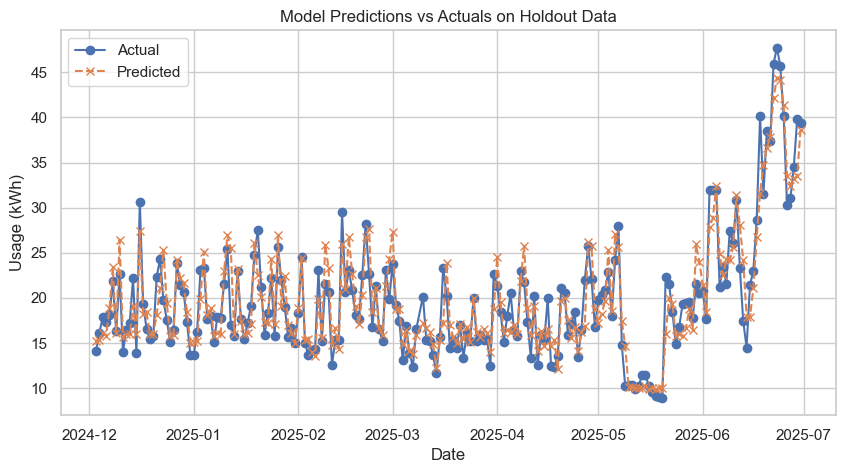

In [83]:
# --- Evaluate Model on Holdout Data ---
holdout_feature_cols = feature_cols = [
    'PrevDay_Usage', 'Rolling3_Mean', 'Weekend',
    'Max_Hourly_Usage', 'Min_Hourly_Usage','Temp_Mean',
] + [col for col in daily.columns if col.startswith('Season_')]

X_holdout = holdout[holdout_feature_cols]
y_holdout = holdout['Usage_kWh']

y_holdout_pred = rf.predict(X_holdout)
mae_holdout = mean_absolute_error(y_holdout, y_holdout_pred)
r2_holdout = r2_score(y_holdout, y_holdout_pred)
print(f'Holdout MAE: {mae_holdout:.2f}')
print(f'Holdout R2: {r2_holdout:.2f}')

plt.figure(figsize=(10,5))
plt.plot(holdout['Date'], y_holdout, 'o-', label='Actual')
plt.plot(holdout['Date'], y_holdout_pred, 'x--', label='Predicted')
plt.legend()
plt.title('Model Predictions vs Actuals on Holdout Data')
plt.xlabel('Date')
plt.ylabel('Usage (kWh)')
plt.show()

**Summary:** The holdout test is the best indicator of real-world performance. We would consider MAE to increase and R² to drop for this compared to the test set.  
- **MAE**:MAE 1–2 kWh: Good (small errors, model is useful)
- **R²**: R² > 0.8 meaning that model captures nearly all patterns.

The model appears to be robust and generalizes well to unseen data. 

# Train model on Train +Test data and check performance against holcout

# Final Model Training and Holdout Evaluation

We will now:
1. Combine all available data (train + test, excluding holdout).
2. Retrain the model using the full dataset.
3. Predict on the holdout set using only available features.
4. Evaluate performance (MAE, R², and plot predictions vs actuals).

Final Holdout MAE: 1.96
Final Holdout R2: 0.86


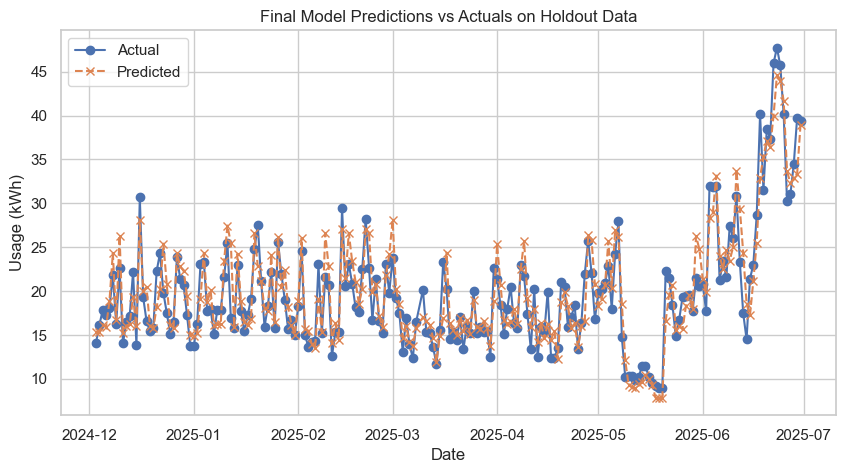

In [86]:
# --- Retrain Model on All Data Except Holdout, Evaluate on Holdout ---
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Prepare full training data (all except holdout)
full_train = daily.copy()  # daily is your main dataframe with features, already processed

# Features for training (exclude target and any unavailable in holdout)
train_feature_cols = [
    'PrevDay_Usage', 'Rolling3_Mean', 'Weekend',
    'Max_Hourly_Usage', 'Min_Hourly_Usage','Temp_Mean',
] + [col for col in daily.columns if col.startswith('Season_')]
 
X_full = full_train[train_feature_cols]
y_full = full_train['Usage_kWh']

# Retrain model
rf_final = RandomForestRegressor(n_estimators=100, random_state=42)
rf_final.fit(X_full, y_full)

# Predict on holdout set
X_holdout = holdout[train_feature_cols]
y_holdout = holdout['Usage_kWh']
y_holdout_pred = rf_final.predict(X_holdout)

# Evaluate
mae_holdout_final = mean_absolute_error(y_holdout, y_holdout_pred)
r2_holdout_final = r2_score(y_holdout, y_holdout_pred)
print(f'Final Holdout MAE: {mae_holdout_final:.2f}')
print(f'Final Holdout R2: {r2_holdout_final:.2f}')

plt.figure(figsize=(10,5))
plt.plot(holdout['Date'], y_holdout, 'o-', label='Actual')
plt.plot(holdout['Date'], y_holdout_pred, 'x--', label='Predicted')
plt.legend()
plt.title('Final Model Predictions vs Actuals on Holdout Data')
plt.xlabel('Date')
plt.ylabel('Usage (kWh)')
plt.show()

**Interpretation**

-  **Final Holdout MAE (1.96) vs Previous (1.80):**
The error increased slightly after retraining on all data, but both values are low (well below 10% of typical daily usage). This means  model is consistently accurate.

-  **Final Holdout R² (0.86) vs Previous (0.88):**
The R² dropped a little, but both values are high. Model explains most of the variation in daily usage, even after retraining.

**Conclusion:**
Retraining on all available data did not significantly improve or degrade performance. Both versions of the model generalize well to unseen data. The small changes are normal and indicate your model is robust. You can confidently use the final model for forecasting.

# ALL DATA ANALYSIS

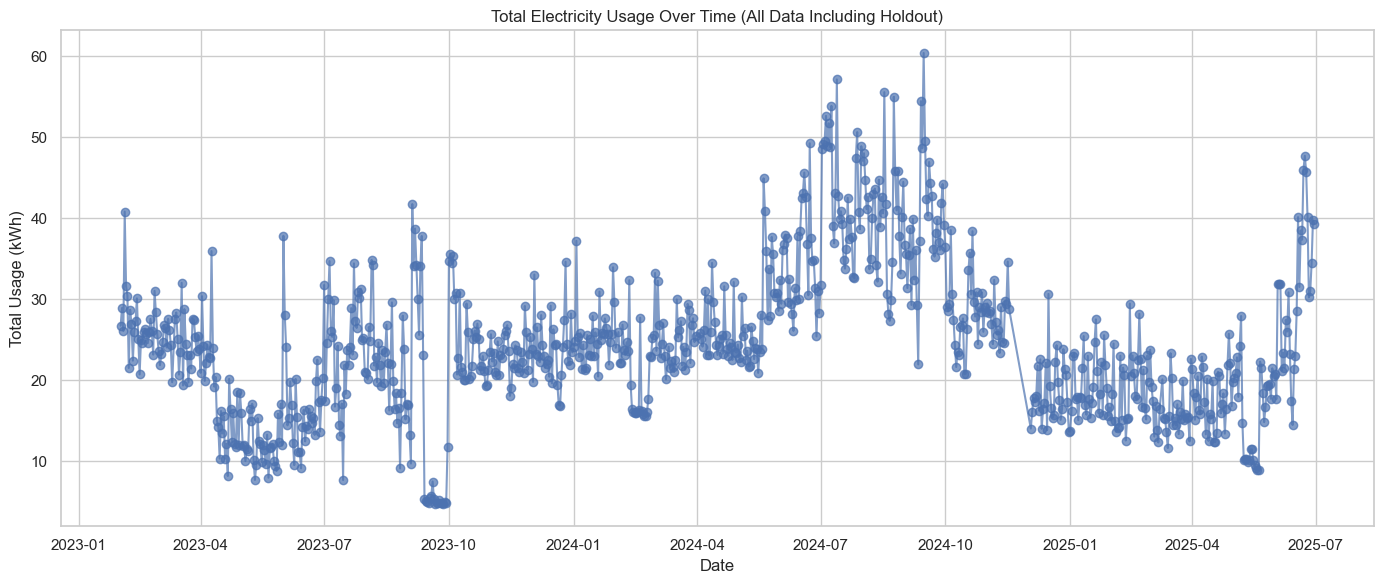

In [87]:
# --- Combine All Data (Main + Holdout) and Plot Total Usage ---
# Concatenate main and holdout dataframes
all_data = pd.concat([daily, holdout], ignore_index=True)
# Sort by date
all_data = all_data.sort_values('Date')
# Plot total usage over time
plt.figure(figsize=(14, 6))
plt.plot(all_data['Date'], all_data['Usage_kWh'], marker='o', linestyle='-', alpha=0.7)
plt.title('Total Electricity Usage Over Time (All Data Including Holdout)')
plt.xlabel('Date')
plt.ylabel('Total Usage (kWh)')
plt.tight_layout()
plt.show()

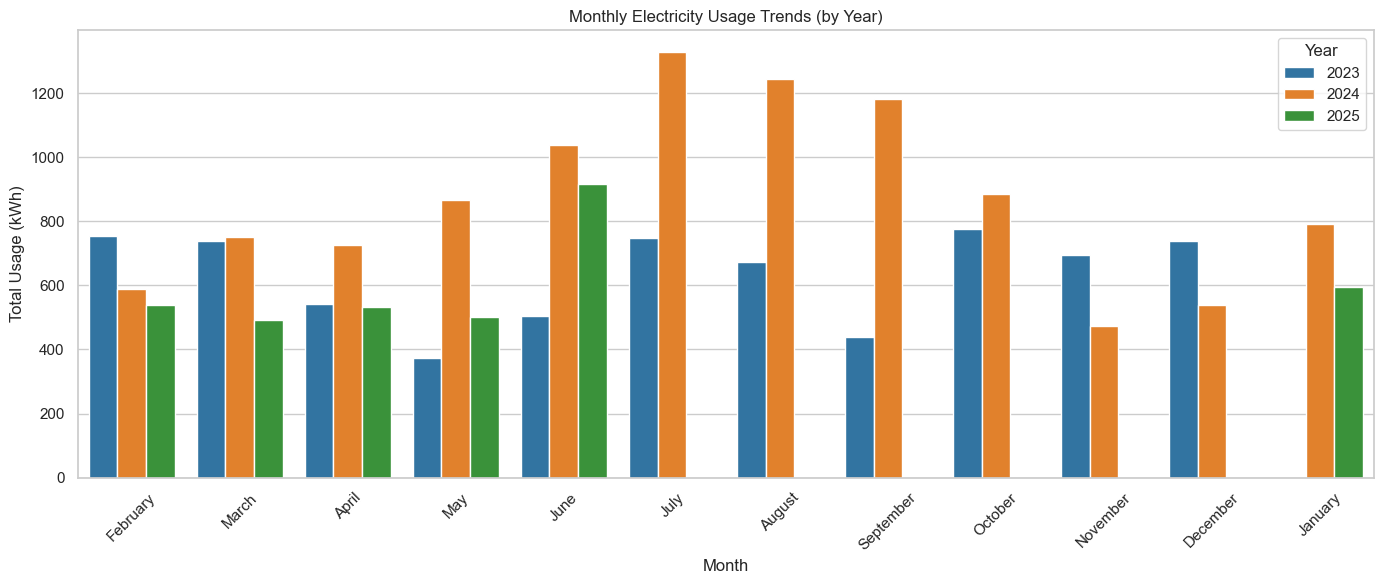

In [92]:
# --- Monthly/Seasonal Variation: Summarize Usage by Month and Season ---
monthly_usage = all_data.copy()
monthly_usage['Date'] = pd.to_datetime(monthly_usage['Date'])
monthly_usage['Month'] = monthly_usage['Date'].dt.month
monthly_usage['Year'] = monthly_usage['Date'].dt.year
monthly_usage['MonthName'] = monthly_usage['Date'].dt.strftime('%B')

# Aggregate total usage by month
hour_columns = [col for col in monthly_usage.columns if str(col).isdigit()]
monthly_usage['Usage_kWh'] = monthly_usage[hour_columns].sum(axis=1)
monthly_summary = monthly_usage.groupby(['Year', 'Month', 'MonthName']).agg({'Usage_kWh': 'sum'}).reset_index()

plt.figure(figsize=(14, 6))
sns.barplot(x='MonthName', y='Usage_kWh', data=monthly_summary, hue='Year', palette='tab10')
plt.xlabel('Month')
plt.ylabel('Total Usage (kWh)')
plt.title('Monthly Electricity Usage Trends (by Year)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Using Environment Variables in Your Project

You can store secrets and configuration (like API keys) in a `.env` file. This keeps them out of your code and makes your project more secure and portable.

**Steps:**
1. Add your variables to the `.env` file in the project root.
2. Use the `python-dotenv` package to load them in your notebook or scripts.
3. Access variables with `os.getenv()`.

See the next code cell for an example.

In [ ]:
# Example: Load environment variables from .env file
from dotenv import load_dotenv
import os

load_dotenv()  # Loads variables from .env into environment
api_key = os.getenv('API_KEY')
db_password = os.getenv('DB_PASSWORD')

print('API_KEY:', api_key)
print('DB_PASSWORD:', db_password)

In [ ]:
# Load DATA_DIR from .env and use in your code
from dotenv import load_dotenv
import os
load_dotenv()
data_dir = os.getenv('DATA_DIR')
print('Data directory from .env:', data_dir)